# ASSIGNMENT 1: Iris Data Classification (Using TensorFlow)
## Prepared by [Mustafa Youldash, Ph.D.](https://github.com/youldash)



### Student Name: Sana Majed Araj
### Section Number: 1

In [ ]:
# What version of Python do you currently have?
import sys


print(sys.version)

3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


In [ ]:
# Do you have TensorFlow installed on your system?
import tensorflow as tf


print(tf.__version__)

2.17.0


# **Import Libraries**

In this part of my assignment, I imported all the libraries I’ll need to get started. I’m using pandas and numpy for managing data and handling numerical calculations, while TensorFlow and Keras will help me build and train the machine learning model. To prepare the data, I included train_test_split for splitting the dataset, StandardScaler to standardize it, and LabelEncoder to handle categorical values. For visualization, I added matplotlib and seaborn to create informative plots and graphs. To evaluate the model’s performance, I brought in classification_report and confusion_matrix, and to prevent overfitting, I incorporated regularization techniques like Dropout and l2. This setup ensures I have everything I need to handle data, train the model, and assess its performance effectively.



In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from scipy import stats
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
import seaborn as sns

# **Load and Preview Data**

In this step, I loaded the Iris dataset from a GitHub link into a Pandas DataFrame and defined the column names to make the data more readable. To confirm everything loaded correctly, I used df.head() to preview the first few rows and df.info() to check the dataset's structure, including data types and whether there are any missing values. This process helps me get a clear understanding of the dataset before diving into further analysis.








In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(url, names=column_names)

print("First few rows of the dataset:")
print(df.head())
print("\nDataset Information:")
df.info()

First few rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# **Check for Null Values**

In this step, I checked for missing values in each column by using df.isnull().sum(). This helps ensure the dataset is clean and ready to proceed with analysis or modeling without any issues caused by incomplete data.

In [ ]:
print("\nNull values in each column:")
print(df.isnull().sum())


Null values in each column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


# **Basic Statistics and Class Distribution**

Here, I calculated summary statistics for the numerical features using df.describe() to understand key metrics like the mean, standard deviation, and percentiles, which help reveal the dataset's distribution. Additionally, I used df['species'].value_counts() to check the number of instances for each class in the target variable.


In [ ]:
print("\nBasic Statistics of Numerical Features:")
print(df.describe())

print("\nClass Distribution:")
print(df['species'].value_counts())


Basic Statistics of Numerical Features:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Class Distribution:
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


# **Feature Distributions (Histograms)**

In this step, I visualized the distributions of sepal_length, sepal_width, petal_length, and petal_width for each species using histograms. These plots help identify patterns or separability between species, with subplots for easy comparison and plt.legend() for clear labeling. This helps understand feature importance for classification.

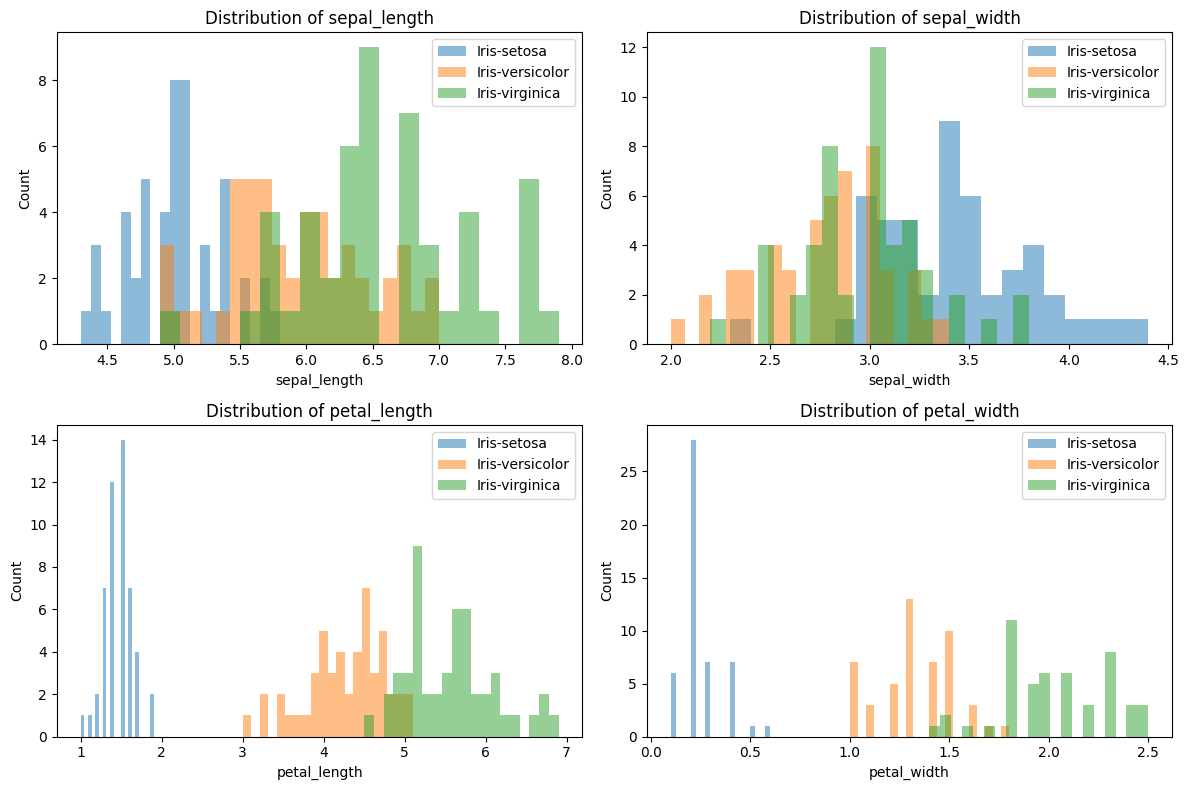

In [ ]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    for species in df['species'].unique():
        subset = df[df['species'] == species]
        plt.hist(subset[feature], label=species, alpha=0.5, bins=20)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend()
plt.tight_layout()
plt.show()

# **Correlation Matrix Heatmap**

This heatmap shows the correlations between the numerical features of the dataset, calculated using df.corr(). Strong positive correlations, such as between petal_length and petal_width (0.96) or sepal_length and petal_length (0.87), indicate that these features tend to increase together. In contrast, sepal_width has weaker or negative correlations with other features, like petal_length (-0.42). The heatmap's color intensity highlights the strength of these relationships, helping to identify dependencies and guide feature selection.

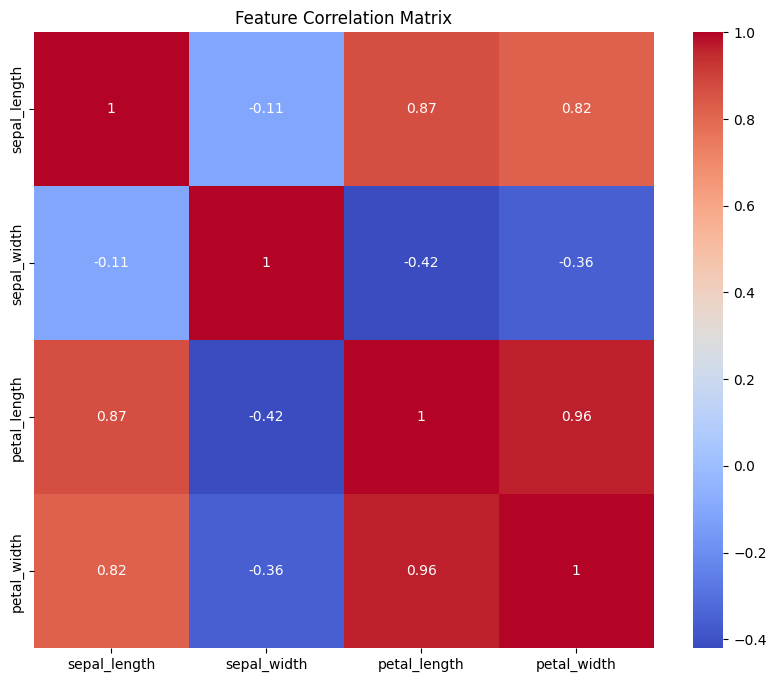

In [ ]:
plt.figure(figsize=(10, 8))
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# **Pair Plot (Scatter Matrix)**

In this cell you will see a pair plot used to visualize relationships between all numerical features, grouped by species. Each scatter plot compares two features, with points color-coded by species for clarity, while the diagonal shows histograms of individual feature distributions. For instance, the petal_length vs. petal_width plot reveals clear separability between species, making these features highly useful for classification. This helps identify patterns, clusters, and class separability based on feature pairings.

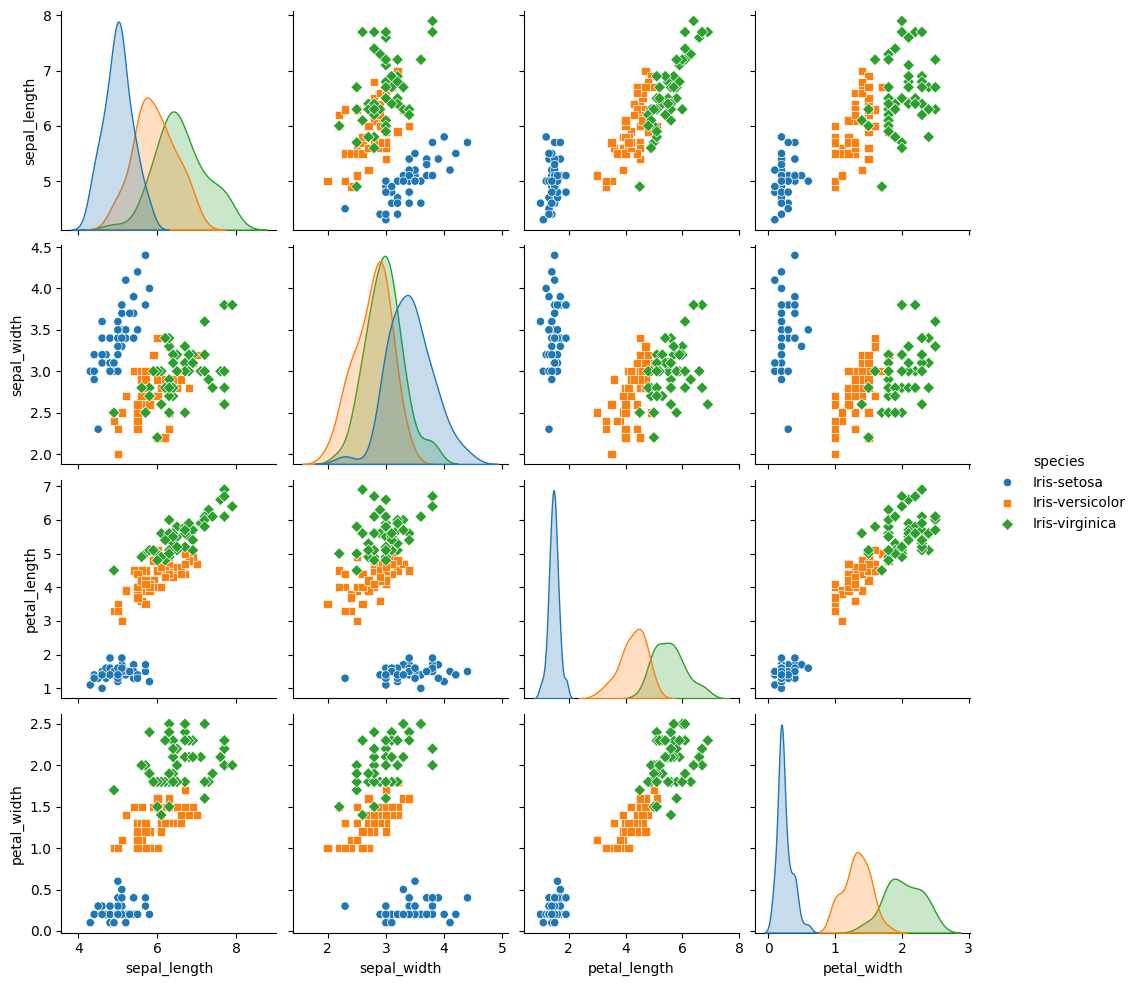

In [ ]:
sns.pairplot(df, hue="species", markers=["o", "s", "D"])
plt.show()

# **Detect and Cap Outliers**

To manage outliers, I used Z-score method with a threshold of 3. Z-scores are calculated for numerical features using stats.zscore(), and values beyond ±3 are capped to limits based on the column mean and standard deviation.

In [ ]:
z_score_threshold = 3
for column in df.columns[:-1]:

    z_scores = stats.zscore(df[column])

    df[column] = np.where(z_scores > z_score_threshold, df[column].mean() + z_score_threshold * df[column].std(),
                          np.where(z_scores < -z_score_threshold, df[column].mean() - z_score_threshold * df[column].std(), df[column]))

# Box Plot to Visualize the Data (After Outlier Capping)


Here, I used box plots to visualize the distribution of numerical features for each species after handling outliers. Each plot focuses on one feature, like sepal_length or petal_width, and shows how it varies across species. The box represents the interquartile range (IQR), and the whiskers extend to data points within 1.5 times the IQR, with any points outside considered outliers. From these plots, I noticed that features like petal_length and petal_width show clear separations between species, making them useful for classification, while sepal_width has more overlap. This helps me understand feature variability and how well the species can be distinguished.


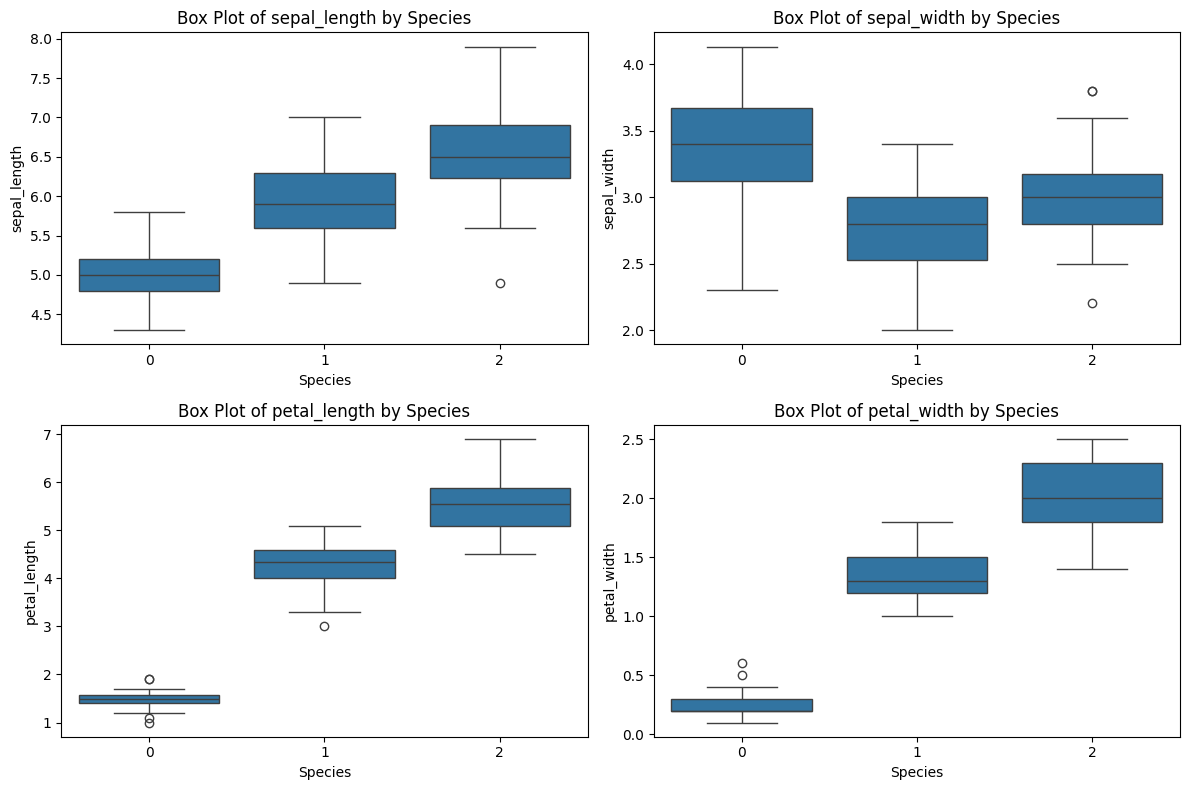

In [ ]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'Box Plot of {feature} by Species')
    plt.xlabel('Species')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

# **Data Preprocessing - Encoding and Scaling**

In this step, I preprocessed the data by encoding the target variable and scaling the features. I used LabelEncoder to convert the species column into numerical labels for the model. Then, I separated the features (X) from the target variable (y) and standardized the features using StandardScaler, so they have a mean of 0 and a standard deviation of 1. After that, I split the dataset into training and testing sets with train_test_split, using 75% of the data for training and 25% for testing. Finally, I printed the shapes of the training and testing sets to confirm the split.

In [ ]:
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

X = df.drop('species', axis=1)
y = df['species']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42
)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (112, 4)
Testing set shape: (38, 4)


# **Model 1 - ReLU Activation with Adam Optimizer**

Here, I built and compiled a neural network using the Keras Sequential API. It has three layers: the first with 16 neurons and ReLU activation (input dimension 4), the second with 8 neurons and ReLU, and the output layer with 3 neurons and softmax activation for multi-class classification. I used the Adam optimizer for training, sparse_categorical_crossentropy as the loss function, and accuracy as the evaluation metric. Finally, I used model1.summary() to display the model’s structure, including layer details and trainable parameters.


In [ ]:
model1 = Sequential([
    Dense(16, input_dim=4, activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

model1.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243 (972.00 B)

 Trainable params: 243 (972.00 B)

 Non-trainable params: 0 (0.00 B)

# **Model 2 - Tanh Activation with SGD Optimizer**

Here, I created and compiled a second neural network using the Keras Sequential API. It’s similar to the first model but uses Tanh activation in the hidden layers and the SGD optimizer for training. The first layer has 16 neurons (Tanh activation, input dimension 4), the second layer has 8 neurons (also Tanh), and the output layer has 3 neurons with softmax activation for multi-class classification. I used the sparse_categorical_crossentropy loss function and accuracy as the evaluation metric. The model2.summary() function confirms the architecture and trainable parameters, showing it’s identical to Model 1 in size but differs in activation functions and optimizer, for performance comparison.

In [ ]:
model2 = Sequential([
    Dense(16, input_dim=4, activation='tanh'),
    Dense(8, activation='tanh'),
    Dense(3, activation='softmax')
])

model2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 16)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243 (972.00 B)

 Trainable params: 243 (972.00 B)

 Non-trainable params: 0 (0.00 B)

# **Model 3 - Increased Layer Complexity with ReLU Activation and Adam Optimizer**

In this step, I designed a more complex neural network (Model 3) with additional layers, L2 regularization, and dropout to improve generalization. The architecture includes a first layer with 32 neurons (ReLU activation, L2 regularization, and 0.3 dropout), a second layer with 16 neurons (ReLU, L2, and 0.3 dropout), and a third layer with 8 neurons (ReLU and L2). The output layer has 3 neurons with softmax activation for multi-class classification. I compiled the model with the Adam optimizer (learning rate 0.001) and sparse_categorical_crossentropy as the loss function, using accuracy as the evaluation metric. The model3.summary() function highlights the more complex structure and additional parameters, designed to balance model capacity and reduce overfitting through regularization.

In [ ]:
model3 = Sequential([
    Dense(32, input_dim=4, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(8, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(3, activation='softmax')
])

model3.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model3.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 32)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 851 (3.32 KB)

 Trainable params: 851 (3.32 KB)

 Non-trainable params: 0 (0.00 B)

# **Model Training - Model 1 with Early Stopping**

I trained Model 1 using early stopping to prevent overfitting and save time. The EarlyStopping callback monitored validation loss (val_loss) and stopped training if it didn’t improve by 0.001 for 10 epochs, with restore_best_weights=True ensuring the best version of the model was kept. I used model1.fit() to train with 80% of the data and 20% for validation, running up to 100 epochs but stopping early if needed. The batch size was set to 16, and verbose=1.



In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=0.001,
    restore_best_weights=True
)

history1 = model1.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.3029 - loss: 1.1672 - val_accuracy: 0.2174 - val_loss: 1.1335
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3699 - loss: 1.1427 - val_accuracy: 0.3043 - val_loss: 1.1100
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3175 - loss: 1.1328 - val_accuracy: 0.3043 - val_loss: 1.0884
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4386 - loss: 1.0832 - val_accuracy: 0.4348 - val_loss: 1.0676
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4832 - loss: 1.0699 - val_accuracy: 0.3913 - val_loss: 1.0467
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5226 - loss: 1.0411 - val_accuracy: 0.4348 - val_loss: 1.0258
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5752 - loss: 1.0082 - val_accuracy: 0.4783 - val_loss: 1.0052
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6393 - loss: 0.9933 - val_accuracy: 0.6522 - val_loss: 0.9

# **Model Training - Model 2 with Early Stopping**

I trained Model 2 using early stopping to optimize training and avoid overfitting. Like with Model 1, the EarlyStopping callback monitored val_loss and stopped training after 10 epochs without at least a 0.001 improvement, restoring the best weights with restore_best_weights=True. I used model2.fit() with 80% of the data for training and 20% for validation (validation_split=0.2), training for up to 100 epochs with a batch size of 16. The verbose=1 setting showed detailed progress.

In [ ]:
history2 = model2.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.4478 - loss: 1.0492 - val_accuracy: 0.5217 - val_loss: 0.9936
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5783 - loss: 0.9439 - val_accuracy: 0.6087 - val_loss: 0.9194
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6177 - loss: 0.8804 - val_accuracy: 0.6522 - val_loss: 0.8596
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6764 - loss: 0.8019 - val_accuracy: 0.6522 - val_loss: 0.8091
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6876 - loss: 0.8063 - val_accuracy: 0.6522 - val_loss: 0.7706
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7028 - loss: 0.7449 - val_accuracy: 0.6522 - val_loss: 0.7378
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7002 - loss: 0.7205 - val_accuracy: 0.6957 - val_loss: 0.7102
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8231 - loss: 0.6442 - val_accuracy: 0.6957 - val_loss: 0.

# **Model Training - Model 3 with Early Stopping**

I trained Model 3 using early stopping to balance its complexity while preventing overfitting. The EarlyStopping callback monitored val_loss and stopped training after 15 epochs without at least a 0.001 improvement, with restore_best_weights=True ensuring the best weights were kept. Training was done with model3.fit(), reserving 20% of the data for validation (validation_split=0.2) and running up to 100 epochs, stopping earlier if needed. I used a batch size of 16 and set verbose=1 for detailed progress updates.

In [ ]:
history3 = model3.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    callbacks=[EarlyStopping(monitor='val_loss', patience=15, min_delta=0.001, restore_best_weights=True)],
    verbose=1
)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.2054 - loss: 1.2518 - val_accuracy: 0.2174 - val_loss: 1.1146
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2200 - loss: 1.2076 - val_accuracy: 0.4783 - val_loss: 1.0637
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2871 - loss: 1.1297 - val_accuracy: 0.4783 - val_loss: 1.0269
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3065 - loss: 1.1230 - val_accuracy: 0.4783 - val_loss: 0.9951
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3797 - loss: 1.0815 - val_accuracy: 0.5217 - val_loss: 0.9650
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4136 - loss: 1.0433 - val_accuracy: 0.6957 - val_loss: 0.9370
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4592 - loss: 1.0332 - val_accuracy: 0.6957 - val_loss: 0.9094
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6247 - loss: 0.9959 - val_accuracy: 0.6957 - val_loss: 0.8

# **Training History Visualization - Model 1**

I visualized Model 1's training history to analyze loss and accuracy trends over the epochs for both training and validation sets. The first plot shows Training Loss and Validation Loss, where decreasing curves indicate effective learning, and their close alignment suggests good generalization. The second plot displays Training Accuracy and Validation Accuracy, with curves approaching 1.0, showing high performance. The tight alignment of these curves confirms the model avoids overfitting while maintaining strong results.


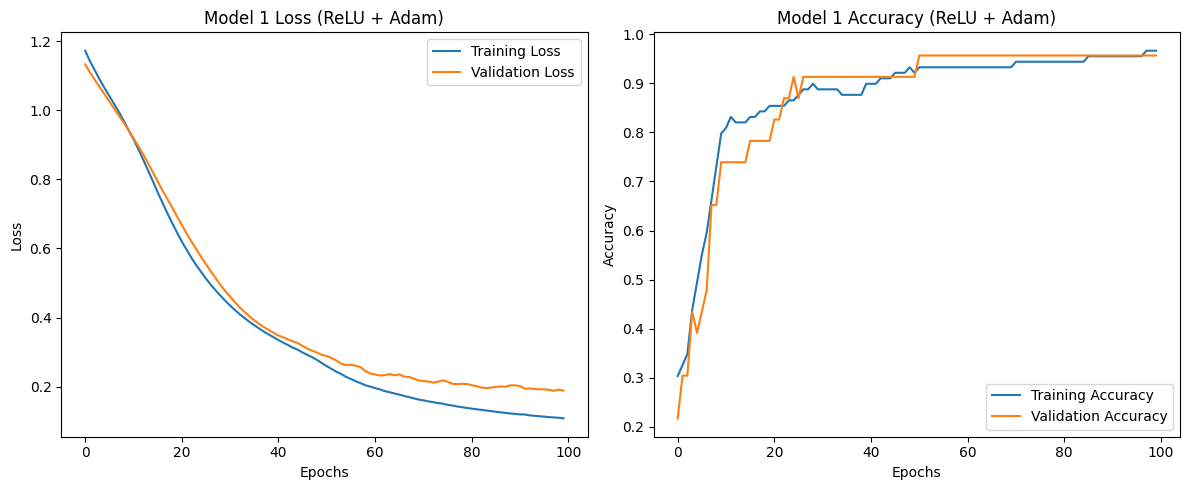

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model 1 Loss (ReLU + Adam)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 1 Accuracy (ReLU + Adam)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# **Training History Visualization - Model 2**

I visualized Model 2's training history to observe trends in loss and accuracy for both training and validation datasets. In the first plot, Training Loss and Validation Loss decrease steadily, showing effective learning, with their close alignment suggesting good generalization. The second plot shows Training Accuracy and Validation Accuracy improving over time, though training accuracy is slightly higher, hinting at mild overfitting. The slower progress in both metrics compared to Model 1 reflects the use of the SGD optimizer, which converges more slowly but can enhance generalization with proper tuning.


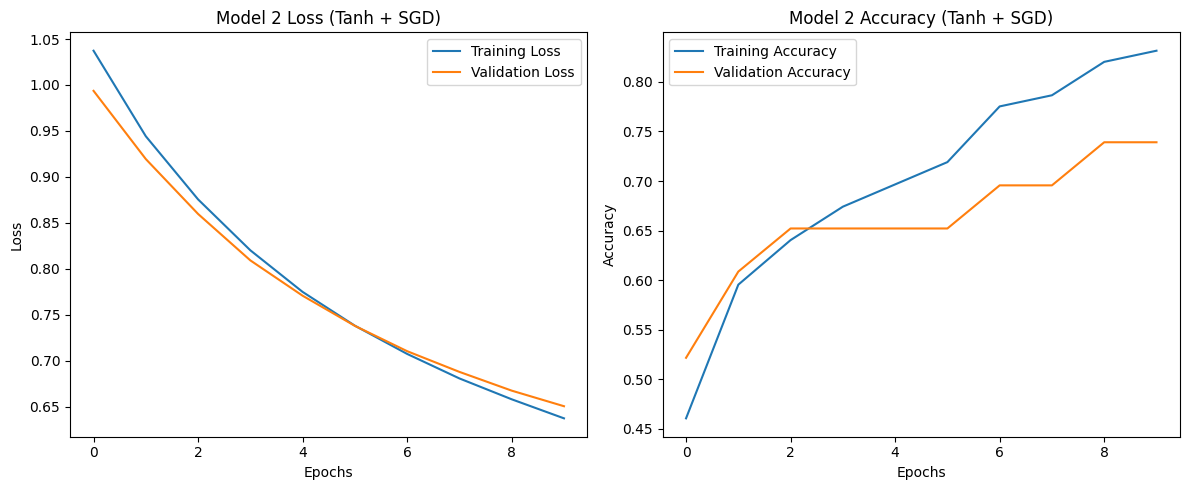

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model 2 Loss (Tanh + SGD)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 2 Accuracy (Tanh + SGD)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# **Training History Visualization - Model 3**

I visualized Model 3's training history to evaluate its performance with increased complexity, L2 regularization, dropout, and the Adam optimizer. The first plot shows Training Loss and Validation Loss decreasing smoothly, with the validation loss closely following the training loss, indicating effective learning and strong generalization. The second plot displays Training Accuracy and Validation Accuracy improving steadily, with both metrics nearing 1.0 and closely aligned, showing minimal overfitting. The use of dropout and L2 regularization clearly helped maintain robustness.





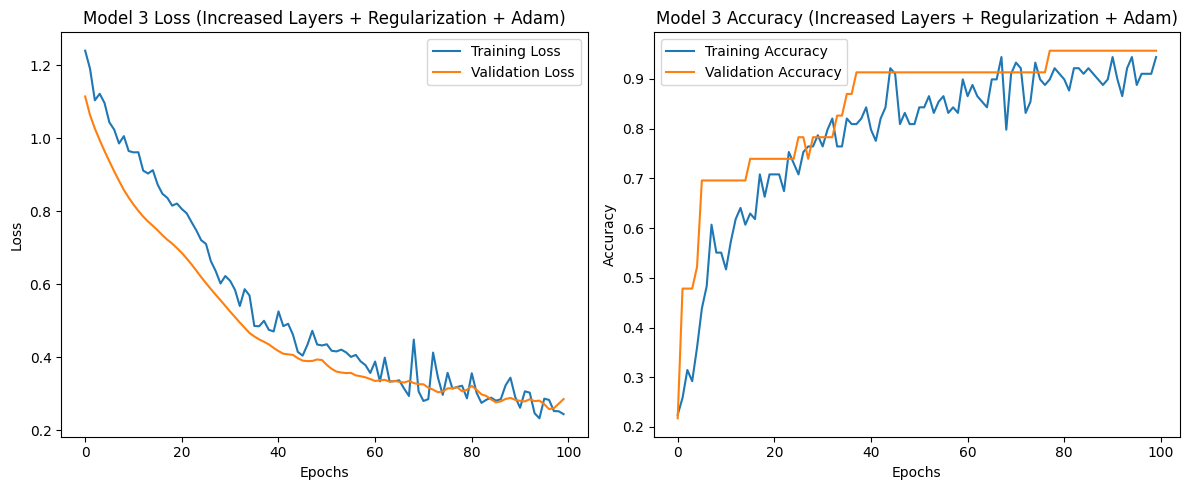

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Model 3 Loss (Increased Layers + Regularization + Adam)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 3 Accuracy (Increased Layers + Regularization + Adam)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# **Model Evaluation - Model 1**

I evaluated Model 1 using a classification report and confusion matrix. The report shows precision, recall, and F1-score for each class, with an overall accuracy of 97% and strong performance across all classes. The confusion matrix confirms this, with most samples correctly classified and just one misclassification in Iris-versicolor. The results show that Model 1 performs very well with minimal errors.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

Model 1 Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



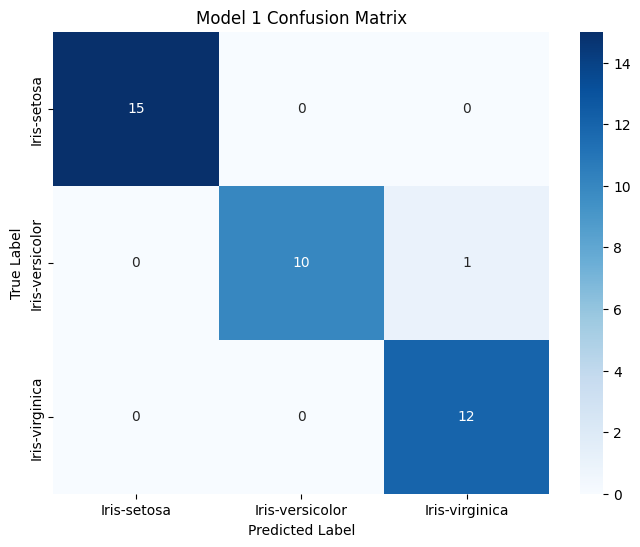

In [ ]:
y_pred1 = np.argmax(model1.predict(X_test), axis=1)
print("\nModel 1 Classification Report:")
print(classification_report(y_test, y_pred1, target_names=[str(class_name) for class_name in label_encoder.classes_]))

plt.figure(figsize=(8, 6))
cm1 = confusion_matrix(y_test, y_pred1)
sns.heatmap(
    cm1, annot=True, fmt='d', cmap='Blues',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.title('Model 1 Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **Model Evaluation - Model 2**

I evaluated Model 2 using a classification report and confusion matrix. The model’s overall accuracy is 61%, much lower than Model 1, highlighting prediction challenges. It performs well for Iris-setosa with high precision (0.71) and recall (1.00), but struggles with Iris-versicolor, where precision, recall, and F1-scores are all 0. For Iris-virginica, performance is moderate, with an F1-score of 0.55.

The confusion matrix shows all Iris-setosa samples are correctly classified, but most Iris-versicolor samples are misclassified as Iris-virginica. Iris-virginica samples are split, with 8 correct predictions and 4 misclassified as Iris-setosa. These results suggest Model 2 struggles with generalization, possibly due to its use of the SGD optimizer and Tanh activation, which may need better tuning.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

Model 2 Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       0.71      1.00      0.83        15
Iris-versicolor       0.00      0.00      0.00        11
 Iris-virginica       0.47      0.67      0.55        12

       accuracy                           0.61        38
      macro avg       0.39      0.56      0.46        38
   weighted avg       0.43      0.61      0.50        38



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


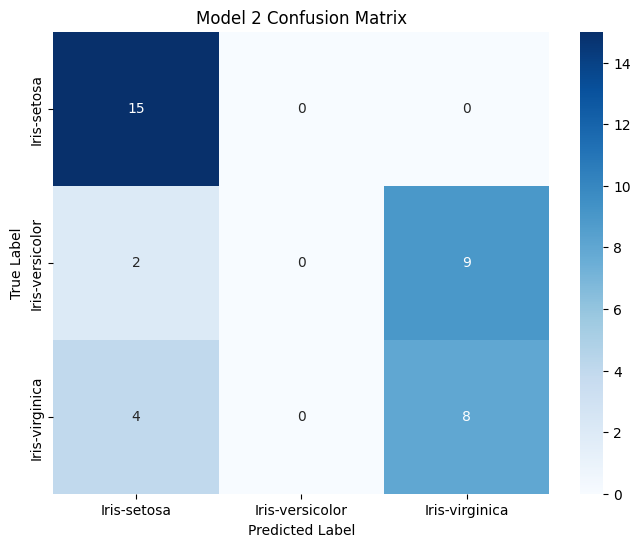

In [ ]:
y_pred2 = np.argmax(model2.predict(X_test), axis=1)
print("\nModel 2 Classification Report:")
print(classification_report(y_test, y_pred2, target_names=[str(class_name) for class_name in label_encoder.classes_]))

plt.figure(figsize=(8, 6))
cm2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(
    cm2, annot=True, fmt='d', cmap='Blues',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.title('Model 2 Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **Model Evaluation - Model 3**

I evaluated Model 3, which achieved perfect performance. The classification report shows precision, recall, and F1-scores of 1.00 for all classes, with an overall accuracy of 100%. This means the model correctly classified every test sample, with no errors.

The confusion matrix confirms this, showing all true labels perfectly aligned with predicted labels, with no misclassifications. Each class—Iris-setosa, Iris-versicolor, and Iris-virginica—was fully predicted correctly.

Model 3's flawless results are likely due to its enhanced architecture, regularization, and optimal tuning, making it the most effective model of the three.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step

Model 3 Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



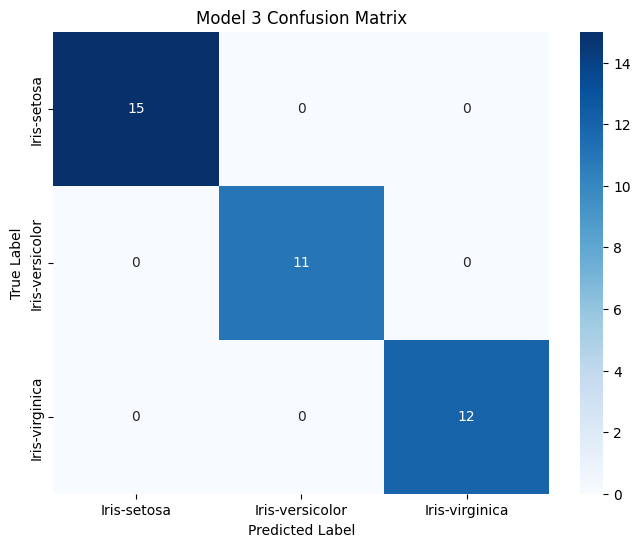

In [ ]:
y_pred3 = np.argmax(model3.predict(X_test), axis=1)

print("\nModel 3 Classification Report:")
print(classification_report(y_test, y_pred3, target_names=[str(class_name) for class_name in label_encoder.classes_]))

plt.figure(figsize=(8, 6))
cm3 = confusion_matrix(y_test, y_pred3)
sns.heatmap(
    cm3, annot=True, fmt='d', cmap='Blues',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.title('Model 3 Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **Model Comparison Summary**

I compared the performance of all three models by evaluating their test loss and accuracy on the test dataset.

***Model 1 (ReLU + Adam)***: Test loss of 0.0814 and accuracy of 97.37%.

***Model 2 (Tanh + SGD):*** Test loss of 0.9595 and accuracy of 60.53%, showing weaker performance.

***Model 3 (Enhanced Layers + Regularization + Adam):***
Test loss of 0.1388 and perfect accuracy of 100%.


In [ ]:
test_loss1, test_accuracy1 = model1.evaluate(X_test, y_test, verbose=0)
test_loss2, test_accuracy2 = model2.evaluate(X_test, y_test, verbose=0)
test_loss3, test_accuracy3 = model3.evaluate(X_test, y_test, verbose=0)

print("\nModel Comparison Summary:")
print(f"Model 1 (ReLU + Adam) - Test Loss: {test_loss1:.4f}, Test Accuracy: {test_accuracy1:.4f}")
print(f"Model 2 (Tanh + SGD) - Test Loss: {test_loss2:.4f}, Test Accuracy: {test_accuracy2:.4f}")
print(f"Model 3 (Increased Layers + Regularization + Adam) - Test Loss: {test_loss3:.4f}, Test Accuracy: {test_accuracy3:.4f}")

if test_accuracy1 > test_accuracy2 and test_accuracy1 > test_accuracy3:
    print("\nModel 1 (ReLU + Adam) performed best on the test set.")
elif test_accuracy2 > test_accuracy1 and test_accuracy2 > test_accuracy3:
    print("\nModel 2 (Tanh + SGD) performed best on the test set.")
elif test_accuracy3 > test_accuracy1 and test_accuracy3 > test_accuracy2:
    print("\nModel 3 (Increased Layers + Regularization + Adam) performed best on the test set.")
else:
    print("\nTwo or more models performed equally well on the test set.")


Model Comparison Summary:
Model 1 (ReLU + Adam) - Test Loss: 0.0814, Test Accuracy: 0.9737
Model 2 (Tanh + SGD) - Test Loss: 0.9559, Test Accuracy: 0.6053
Model 3 (Increased Layers + Regularization + Adam) - Test Loss: 0.1388, Test Accuracy: 1.0000

Model 3 (Increased Layers + Regularization + Adam) performed best on the test set.


This assignment was such an exciting experience.

 I got to work with deep learning to classify iris species using the Iris dataset, and I learned so much along the way. It was incredible to see how everything came together, from preprocessing the data to designing and evaluating different models.

One of the first things I worked on was preparing the data. Splitting the dataset into training, validation, and test sets was also super important because it helped me evaluate the models without any bias. These steps might seem small, but I realized how crucial they are in setting a solid foundation for the whole project.

Building and training the models was probably my favorite part. I started with Model 1, which used ReLU activation and the Adam optimizer. It performed really well and gave me a strong baseline to compare with. Then I tried Model 2, which used Tanh activation and the SGD optimizer. This was more experimental, and it showed me how different activation functions and optimizers can influence results. Finally, I built Model 3, which was more complex, with extra layers, L2 regularization, and dropout. It was challenging to balance the complexity with regularization, but it was so satisfying to see how these changes helped improve performance.

I used early stopping for all the models to avoid overfitting, and I saw how useful techniques like dropout and L2 regularization can be, especially for a model as complex as Model 3. While Model 1 performed strongly overall, Model 3 really stood out with its perfect accuracy, showing me the value of carefully tuning the architecture and hyperparameters.

This assignment taught me how small decisions, like handling outliers or choosing the right optimizer, can make a big difference. It was also a great opportunity to practice balancing complexity and regularization to build a model that generalizes well. Overall, I’m really happy with how much I learned through this assignment.